<a href="https://colab.research.google.com/github/Davidportlouis/cifar_10_classifier/blob/master/cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import time
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
from torchvision import transforms,datasets
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
import torch.nn.functional as F
from helper import plot_batch,train,test,predict

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(mean=(0.5,0.5,0.5),
                       std=(0.5,0.5,0.5))
])

train_images = datasets.CIFAR10("./",train=True,transform=transform,download=True)
test_images = datasets.CIFAR10("./",train=False,transform=transform,download=True)

train_len = len(train_images)
idx = list(range(train_len))
np.random.shuffle(idx)
split = int(np.floor(0.2 * train_len))
valid_idx,train_idx = idx[:split],idx[split:]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = DataLoader(train_images,batch_size=20,sampler=train_sampler)
valid_loader = DataLoader(train_images,batch_size=20,sampler=valid_sampler)
test_loader = DataLoader(test_images,batch_size=20,shuffle=True)

classes = train_images.classes

Files already downloaded and verified
Files already downloaded and verified


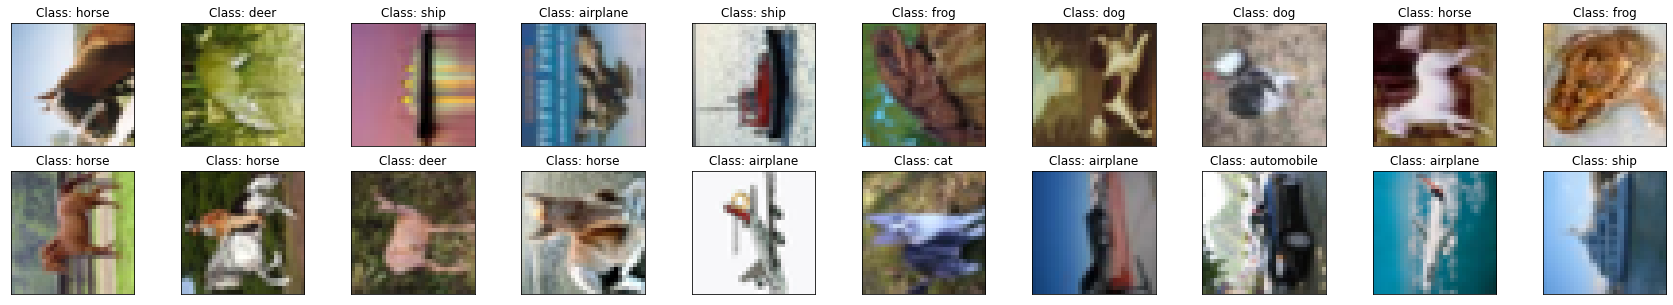

In [4]:
train_images,train_labels = next(iter(train_loader))
plot_batch(train_images,classes,train_labels,normalize=True)

In [14]:
class CifarNet(nn.Module):

  def __init__(self,conv_dim=16):
    super(CifarNet,self).__init__()
    # defining layers
    self.conv_1 = nn.Conv2d(3,conv_dim,3,padding=1)
    self.bnorm_1 = nn.BatchNorm2d(conv_dim)
    self.conv_2 = nn.Conv2d(conv_dim,conv_dim*2,3,padding=1)
    self.bnorm_2 = nn.BatchNorm2d(conv_dim*2)
    self.conv_3 = nn.Conv2d(conv_dim*2,conv_dim*4,3,padding=1)
    self.bnorm_3 = nn.BatchNorm2d(conv_dim*4)
    self.conv_4 = nn.Conv2d(conv_dim*4,conv_dim*8,3,padding=1)
    self.bnorm_4 = nn.BatchNorm2d(conv_dim*8)
    self.maxpool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(2*2*conv_dim*8,510)
    self.fc2 = nn.Linear(510,10)
    self.drop = nn.Dropout(p=0.2)

  def forward(self,x):
    x = self.conv_1(x)
    x = F.relu(self.bnorm_1(x))
    x = self.maxpool(x)
    x = self.conv_2(x)
    x = F.relu(self.bnorm_2(x))
    x = self.maxpool(x)
    x = self.conv_3(x)
    x = F.relu(self.bnorm_3(x))
    x = self.maxpool(x)
    x = self.conv_4(x)
    x = F.relu(self.bnorm_4(x))
    x = self.maxpool(x)
    x = x.view(x.shape[0],-1)
    x = self.drop(x)
    x = F.relu(self.fc1(x))
    x = self.drop(x)
    x = F.log_softmax(self.fc2(x),dim=1)
    return x

model = CifarNet()
model = model.to(device)
print(model)

CifarNet(
  (conv_1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm_1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm_2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm_3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm_4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=510, bias=True)
  (fc2): Linear(in_features=510, out_features=10, bias=True)
  (drop): Dropout(p=0.2, inplace=False)
)


In [17]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)
train_loss,valid_loss = train(model,train_loader,valid_loader,optimizer,criterion,30,device)

epoch: 1/30 trainloss: 0.92249 validloss: 0.92970 time: 20.139 sec
Loss decresed: inf -> 0.92970
epoch: 2/30 trainloss: 0.88778 validloss: 0.87632 time: 19.846 sec
Loss decresed: 0.92970 -> 0.87632
epoch: 3/30 trainloss: 0.86520 validloss: 0.92197 time: 19.766 sec
epoch: 4/30 trainloss: 0.85509 validloss: 0.85962 time: 19.750 sec
Loss decresed: 0.87632 -> 0.85962
epoch: 5/30 trainloss: 0.82928 validloss: 0.87774 time: 19.857 sec
epoch: 6/30 trainloss: 0.81926 validloss: 0.89309 time: 19.756 sec
epoch: 7/30 trainloss: 0.81261 validloss: 0.87263 time: 19.792 sec
epoch: 8/30 trainloss: 0.79231 validloss: 0.82738 time: 19.732 sec
Loss decresed: 0.85962 -> 0.82738
epoch: 9/30 trainloss: 0.78162 validloss: 0.85984 time: 19.846 sec
epoch: 10/30 trainloss: 0.77646 validloss: 0.84334 time: 19.717 sec
epoch: 11/30 trainloss: 0.77304 validloss: 0.85328 time: 19.662 sec
epoch: 12/30 trainloss: 0.75135 validloss: 0.86234 time: 19.512 sec
epoch: 13/30 trainloss: 0.74531 validloss: 0.85776 time: 19.6

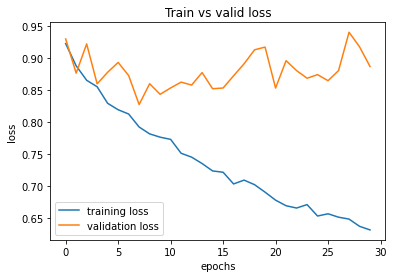

In [18]:
plt.plot(train_loss,label="training loss")
plt.plot(valid_loss,label="validation loss")
plt.title("Train vs valid loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [20]:
state_dict = torch.load("model_weights.pth")
model.load_state_dict(state_dict)

<All keys matched successfully>

In [21]:
test(model,test_loader,optimizer,criterion,device)

testloss: 0.819897 accuracy: 0.725


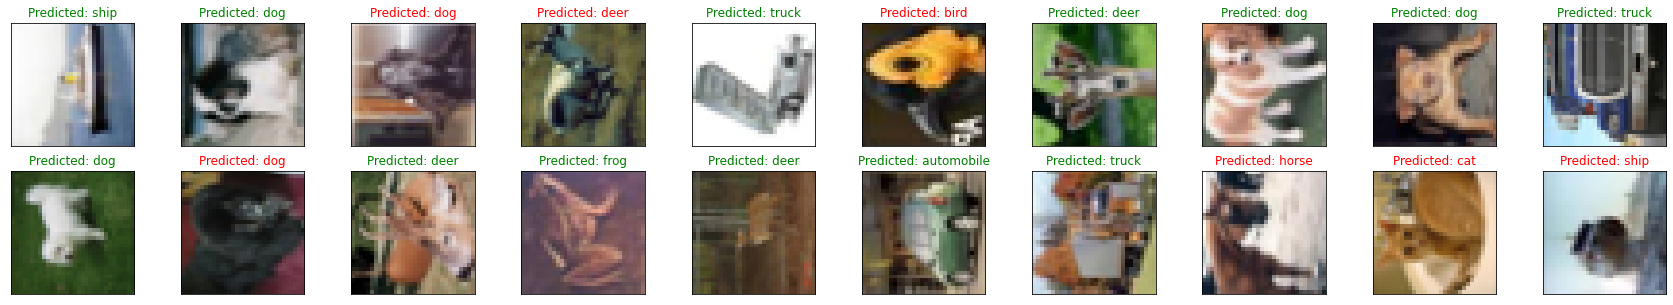

In [22]:
test_images,test_labels = next(iter(test_loader))
predict(test_images,classes,test_labels,model,device)